# Mod 4 Project Office Hours 

- 06/09/20

## Questions

- Explaining what words were important for a Neural Network
    - Look into classification from Lime, Yellowbrick, Eli5, 
    
- EDA/Visuals:
    - Word clouds - https://www.datacamp.com/community/tutorials/wordcloud-python
    - Bigrams - Looking for mutual information pmi.
    - Sentiment Analysis with Vader from NLTK
    - [Scattertext](https://github.com/JasonKessler/scattertext)
    
- Overlapping Multi-Class Classification Task (multi y-columns)
    - Loop through the columns in the training and test data to pull out each one and then run separate sklearn classification_report/confusion matrices
    - Since predictions form ANNs are probabilities, you will need to round each column to 0 or 1 before running through sklearn

## Data 

In [ ]:
# !pip install -U seaborn

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.22 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
# %conda uninstall matplotlib

In [ ]:
# %conda install -c conda-forge matplotlib


In [3]:
mpl.__version__

'3.2.1'

In [4]:
import matplotlib

In [5]:
matplotlib.__version__

'3.2.1'

In [6]:
!python --version

Python 3.6.9 :: Anaconda, Inc.


In [7]:
# import matplotlib as mpl
matplotlib.get_configdir()

'/Users/jamesirving/.matplotlib'

In [8]:
matplotlib.__file__

'/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/__init__.py'

In [9]:
import os,shutil,glob
# search_dir="/Users/jamesirving/Downloads/"

In [10]:
# with open('README.md') as f:
#     dp.display(dp.Markdown(f.read()))

<div style="display:block;border-left: 3px solid black;padding:2em;">  Build a model that can rate the sentiment of a Tweet based on its content.

</div>

In [11]:
# os.listdir(search_dir)

In [12]:
# files = list(filter(os.path.isfile, glob.glob(search_dir + "*")))
# files.sort(key=lambda x: os.path.getmtime(x))


In [13]:
os.listdir()

['student-NLP.ipynb',
 'judge-1377884607_tweet_product_company.csv',
 'time-series',
 'LICENSE.md',
 'student-recommendation.ipynb',
 'images',
 'ml-latest-small',
 'Models',
 'student-pneumonia.ipynb',
 'README.md',
 '.gitignore',
 'CONTRIBUTING.md',
 '.ipynb_checkpoints',
 '.learn',
 '.git']

In [14]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding='latin-1')
df = df[~(df['is_there_an_emotion_directed_at_a_brand_or_product']=="I can't tell")]
df = df.drop(columns=['emotion_in_tweet_is_directed_at'])
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [15]:
print(df.isna().sum())
df.dropna(inplace=True)
print(df.isna().sum())

tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64
tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64


In [16]:
y = df['is_there_an_emotion_directed_at_a_brand_or_product'].rename('sentiment')
y.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: sentiment, dtype: int64

In [17]:
y.value_counts(1)

No emotion toward brand or product    0.602954
Positive emotion                      0.333259
Negative emotion                      0.063787
Name: sentiment, dtype: float64

In [18]:
import nltk,string

In [19]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords += string.punctuation
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
# tokenizer.tokenize()

In [21]:
df['tweet_text'] 

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 8936, dtype: object

In [22]:
def clean_tweet(text):
    clean_text = tokenizer.tokenize(text)
    stopped_text = [w.lower() for w in clean_text if w.lower() not in stopwords]
    return stopped_text

In [23]:
df['text_stopped'] = df['tweet_text'].map(clean_tweet)
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,text_stopped
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,"[@wesley83, 3g, iphone, 3, hrs, tweeting, #ris..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,"[@jessedee, know, @fludapp, awesome, ipad, iph..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,"[@swonderlin, wait, #ipad, 2, also, sale, #sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,"[@sxsw, hope, year's, festival, crashy, year's..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,"[@sxtxstate, great, stuff, fri, #sxsw, marissa..."
...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,"[ipad, everywhere, #sxsw, link]"
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,"[wave, buzz, ..., rt, @mention, interrupt, reg..."
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,"[google's, zeiger, physician, never, reported,..."
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,"[verizon, iphone, customers, complained, time,..."


In [24]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].isna().sum()

0

In [25]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
encoder = LabelEncoder()
# encoder = OrdinalEncoder()
df['target'] = encoder.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,text_stopped,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,"[@wesley83, 3g, iphone, 3, hrs, tweeting, #ris...",0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,"[@jessedee, know, @fludapp, awesome, ipad, iph...",2
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,"[@swonderlin, wait, #ipad, 2, also, sale, #sxsw]",2
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,"[@sxsw, hope, year's, festival, crashy, year's...",0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,"[@sxtxstate, great, stuff, fri, #sxsw, marissa...",2
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,"[ipad, everywhere, #sxsw, link]",2
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,"[wave, buzz, ..., rt, @mention, interrupt, reg...",1
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,"[google's, zeiger, physician, never, reported,...",1
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,"[verizon, iphone, customers, complained, time,...",1


In [26]:
X = df['tweet_text'].copy()
y = df['target'].copy()
display(X.head(),y.head())

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

0    0
1    2
2    2
3    0
4    2
Name: target, dtype: int64

In [27]:
y.value_counts(normalize=True)

1    0.602954
2    0.333259
0    0.063787
Name: target, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,stratify=y,random_state=42)

In [29]:
X_tr

2660    If you are heading to #sxsw make sure you have...
3157           Showing off Uzu iPad app. #tapworthy #sxsw
8020    Chris Messina from Google thinks a scope searc...
8693    Catching up with @mention in our hotel room af...
6573    RT @mention RT @mention It's not a rumor: Appl...
                              ...                        
506     Hey #SXSW folks please keep us posted on Googl...
8627    I need a Twitter app recommendation for my new...
6797    RT @mention Thrilled to have former Chief Tale...
9001    Apparently mobile #sxsw GO app is not compatib...
6166    So @mention is back from #sxsw and he's brough...
Name: tweet_text, Length: 6702, dtype: object

In [30]:
# from sklearn.datasets import fetch_20newsgroups
# categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
# twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
# twenty_train['data'][0]

In [31]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import SGDClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics

# # tf_transformer = TfidfTransformer(use_idf=True)
# # tf_transformer.fit_transform()

In [32]:
# pipe_forest = Pipeline([('vectorize', CountVectorizer()),
#                 ('tfidf',TfidfTransformer()),
#                  ('clf',RandomForestClassifier(random_state=42))])
# pipe_bayes = Pipeline([('vectorize', CountVectorizer()),
#                 ('tfidf',TfidfTransformer()),
#                  ('clf',MultinomialNB())])

In [33]:
# pipe = Pipeline([('vectorize', CountVectorizer()),
#                 ('tfidf',TfidfTransformer()),
#                  ('clf',SGDClassifier(random_state=42,max_iter=5,tol=None))])


# def fit_evaluate_pipe(pipe,X_tr,X_te,y_tr,y_te):
#     pipe.fit(X_tr,y_tr)
#     y_hat_te = pipe.predict(X_te)
#     print(metrics.classification_report(y_te,y_hat_te,target_names=encoder.inverse_transform([0,1,2])))
#     metrics.plot_confusion_matrix(pipe,X_te,y_te,cmap='Blues',normalize='true',
#                                      display_labels=encoder.inverse_transform([0,1,2]),xticks_rotation=45)

In [34]:
# fit_evaluate_pipe(pipe,X_tr,X_te,y_tr,y_te)

In [35]:
# fit_evaluate_pipe(pipe_forest,X_tr,X_te,y_tr,y_te)

In [36]:
# fit_evaluate_pipe(pipe_bayes,X_tr,X_te,y_tr,y_te)

In [37]:
# from sklearn.utils.validation import check_is_fitted

# model = pipe.named_steps['clf']
# check_is_fitted(model)

# pipe.named_steps

In [38]:
# from sklearn.model_selection import GridSearchCV

# parameters = { 'vectorize__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
#               'clf__alpha': (1e-2, 1e-3),
#              'clf__class_weight':['balanced',None]}
# search = GridSearchCV(pipe,parameters,scoring='recall_weighted')

# search.fit(X_tr,y_tr)

# search.best_params_

In [39]:
# search.best_score_

In [40]:
# y_hat_te = search.predict(X_te)
# y_hat_tr = search.predict(X_tr)

# print(metrics.classification_report(y_te,y_hat_te))
# metrics.plot_confusion_matrix(search,X_te,y_te,cmap='Blues',normalize='true',
#                                  display_labels=encoder.inverse_transform([0,1,2]),xticks_rotation=45)

In [41]:
# print(metrics.classification_report(y_tr,y_hat_tr
#                                    ))
# metrics.plot_confusion_matrix(search,X_tr,y_tr,cmap='Blues',normalize='true',
#                                  display_labels=encoder.inverse_transform([0,1,2]),xticks_rotation=45)

# Neural Networks

In [42]:
X = df['tweet_text'].copy()
y = df['target'].copy()
display(X.head(),y.head())

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

0    0
1    2
2    2
3    0
4    2
Name: target, dtype: int64

In [43]:
from keras.utils import to_categorical
y_ohe = to_categorical(y)
y_ohe

Using TensorFlow backend.


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [44]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y_ohe,stratify=y_ohe,random_state=42)

In [45]:
from keras.preprocessing.text import Tokenizer
NUM_WORDS = 10000
tokenizer =Tokenizer(num_words=NUM_WORDS)
# tokenizer

In [46]:
tokenizer.fit_on_texts(X_tr)
word_index = tokenizer.word_index
len(word_index)

8863

In [47]:
## X_tr to sequences
from keras.preprocessing.sequence import pad_sequences
X_tr_seq = tokenizer.texts_to_sequences(X_tr)
type(X_tr_seq)

list

In [48]:
X_tr_seq[0]

[7,
 2,
 417,
 100,
 236,
 204,
 1017,
 320,
 105,
 269,
 7,
 2,
 12,
 79,
 11,
 36,
 21,
 19,
 6,
 1,
 4]

In [49]:
list(map(len, X_tr_seq))

[21,
 29,
 16,
 18,
 18,
 7,
 16,
 16,
 24,
 19,
 21,
 13,
 16,
 13,
 17,
 14,
 15,
 13,
 21,
 24,
 19,
 18,
 18,
 24,
 25,
 20,
 26,
 21,
 13,
 18,
 18,
 21,
 12,
 26,
 25,
 18,
 18,
 10,
 19,
 26,
 25,
 25,
 10,
 16,
 21,
 19,
 23,
 13,
 14,
 19,
 18,
 18,
 12,
 28,
 20,
 23,
 20,
 18,
 12,
 22,
 15,
 19,
 21,
 23,
 12,
 21,
 16,
 15,
 24,
 24,
 29,
 9,
 26,
 20,
 18,
 24,
 10,
 8,
 20,
 14,
 17,
 13,
 28,
 23,
 20,
 14,
 23,
 16,
 18,
 28,
 24,
 11,
 21,
 17,
 20,
 27,
 21,
 19,
 22,
 21,
 12,
 16,
 18,
 17,
 21,
 11,
 21,
 16,
 15,
 9,
 23,
 22,
 16,
 9,
 28,
 16,
 23,
 25,
 10,
 25,
 20,
 12,
 21,
 16,
 15,
 19,
 16,
 20,
 8,
 13,
 22,
 15,
 22,
 14,
 21,
 23,
 15,
 28,
 16,
 12,
 19,
 18,
 20,
 13,
 21,
 22,
 20,
 10,
 17,
 12,
 16,
 10,
 18,
 19,
 17,
 18,
 25,
 19,
 23,
 23,
 25,
 16,
 19,
 24,
 16,
 12,
 20,
 23,
 16,
 18,
 13,
 10,
 20,
 19,
 21,
 12,
 24,
 23,
 12,
 18,
 22,
 22,
 22,
 22,
 19,
 16,
 18,
 20,
 17,
 21,
 26,
 19,
 18,
 22,
 22,
 23,
 8,
 20,
 13,
 21,
 15,
 1

In [50]:
## max seq length
MAX_SEQUENCE=100#max(list(map(lambda x: len(x),X_tr_seq)))
MAX_SEQUENCE

100

In [51]:
SEQUENCE_LENGTH= MAX_SEQUENCE
X_tr_seq = pad_sequences(X_tr_seq,MAX_SEQUENCE)
X_tr_seq[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    7,    2,  417,  100,  236,  204, 1017,  320,  105,
        269,    7,    2,   12,   79,   11,   36,   21,   19,    6,    1,
          4], dtype=int32)

In [52]:
X_te_seq = tokenizer.texts_to_sequences(X_te)
X_te_seq = pad_sequences(X_te_seq,MAX_SEQUENCE)

X_te_seq[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   14,  776,    7,    2,
          1,    8,   19,  357,   45,   14,  619,  796, 1146,  496,  110,
        293], dtype=int32)

In [53]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten

In [54]:
VOCAB_LEN = len(word_index)+1
SEQUENCE_LENGTH = MAX_SEQUENCE

In [55]:
BATCH_SIZE = 64
SEQUENCE_LENGTH

100

In [56]:
y_tr.shape[1]

3

In [57]:
from keras import callbacks
import os 
checkpoint_folder = 'Models/checkpoints/'
checkpoint_filename = "weights.{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint_path = checkpoint_folder+checkpoint_filename
os.makedirs(checkpoint_folder,exist_ok=True)
checkpoint_path

'Models/checkpoints/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5'

In [58]:
checkpoint = callbacks.ModelCheckpoint(checkpoint_path,verbose=1,monitor='val_accuracy',
                                       save_best_only=True,save_weights_only=True)
earlystop = callbacks.EarlyStopping(monitor='val_accuracy',patience=2)
callbacks_list= [checkpoint,earlystop]

In [59]:
from keras.layers import Embedding,LSTM,GRU,GlobalMaxPool1D,Dropout,Dense,Bidirectional

model = Sequential()
embedding_size = 128
model.add(Embedding(NUM_WORDS, embedding_size, input_length=SEQUENCE_LENGTH))

model.add(Bidirectional(GRU(25, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 50)           23100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [60]:
from keras.wrappers.scikit_learn import KerasClassifier


In [61]:
history = model.fit(X_tr_seq, y_tr, epochs=3, batch_size=32, validation_split=0.1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 6031 samples, validate on 671 samples
Epoch 1/3
6031/6031 [==============================] - 18s 3ms/step - loss: 0.8864 - accuracy: 0.5851 - val_loss: 0.8172 - val_accuracy: 0.6095
Epoch 2/3
6031/6031 [==============================] - 17s 3ms/step - loss: 0.7748 - accuracy: 0.6516 - val_loss: 0.7471 - val_accuracy: 0.6557
Epoch 3/3
6031/6031 [==============================] - 17s 3ms/step - loss: 0.6503 - accuracy: 0.7332 - val_loss: 0.7681 - val_accuracy: 0.6468


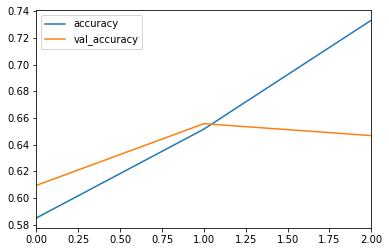

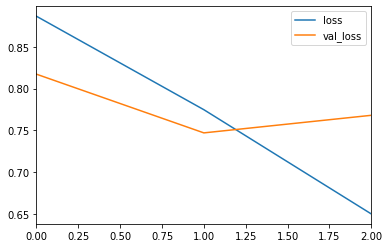

In [62]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy','val_accuracy']].plot()
history_df[['loss','val_loss']].plot()

In [63]:
y_hat_te = model.predict(X_te_seq)
y_hat_te[0]

array([0.07311306, 0.59702826, 0.32985857], dtype=float32)

In [76]:

def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
        thresh=0.5
    else:
        fmt= 'd'
        thresh=cm.max()/2
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='black' if cm[i,j]<thresh else "white",#'darkgray',
                        **fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig


In [77]:
y_te

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [78]:
from sklearn import metrics
print(metrics.classification_report(y_te.argmax(axis=1),y_hat_te.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.02      0.04       142
           1       0.74      0.81      0.77      1347
           2       0.56      0.57      0.56       745

    accuracy                           0.68      2234
   macro avg       0.68      0.47      0.46      2234
weighted avg       0.68      0.68      0.66      2234



In [79]:
y_hat_te

array([[0.07311306, 0.59702826, 0.32985857],
       [0.08107234, 0.2064287 , 0.71249896],
       [0.06607819, 0.57791615, 0.35600567],
       ...,
       [0.0081293 , 0.91323465, 0.07863597],
       [0.00188054, 0.9745709 , 0.02354861],
       [0.02217011, 0.87170315, 0.10612674]], dtype=float32)

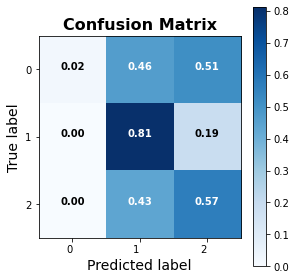

In [80]:
plot_confusion_matrix((y_te,y_hat_te));

In [81]:
print(y_hat_te.shape)
y_hat_te[:5]

(2234, 3)


array([[0.07311306, 0.59702826, 0.32985857],
       [0.08107234, 0.2064287 , 0.71249896],
       [0.06607819, 0.57791615, 0.35600567],
       [0.00196028, 0.9544457 , 0.04359404],
       [0.09439602, 0.34685785, 0.55874616]], dtype=float32)

In [82]:
y_hat_te.argmax(axis=1)[:5]

array([1, 2, 1, 1, 2])

In [ ]:
y_te[0]

In [ ]:
y_te.argmax(axis=1)

In [ ]:
y_hat_te.argmax(axis=1)

In [ ]:
y_te[0]

In [ ]:
X_te_seq[0].shape

In [ ]:
tokenizer.sequences_to_texts([X_te_seq[0]])

In [ ]:
ex = X_te_seq[0]
ex

In [ ]:
X_te.iloc[0]

In [ ]:
missed_rows = y_te.argmax(axis=1) != y_hat_te.argmax(axis=1)
missed_labels = y_te[missed_rows]
missed_texts = X_te_seq[missed_rows]
missed_texts

In [ ]:
i=0
txt = missed_texts[i]
lbl = missed_labels[i]
print(i)
print(txt)
tokenizer.sequences_to_texts(missed_texts)